In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
def read_multi_folder(folder, nodes, enable_pgo=True):
    paths = {}
    paths_pgo = {}
    t0 = None
    for i in nodes:
        output_folder = folder + str(i) + "/"
        _paths, t0 = read_paths(output_folder, [i], t0=t0)
        if enable_pgo:
            _paths_pgo, t0 = read_paths(output_folder, [i], prefix="pgo_", t0=t0)
            paths_pgo[i] = _paths_pgo[i]
        paths[i] = _paths[i]
    if len(paths_pgo) == 0:
        return paths, None, t0
    return paths, paths_pgo, t0


In [ ]:
nodes = [1, 2, 5, 6, 7]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-sync/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_noyaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_noyaw_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths_vo, paths_gt, dte=dte, show=False))

# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))


In [ ]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-async/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_yaw_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths_vo, paths_gt, dte=dte, show=False))

# plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))




In [ ]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-sync/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))


'<table>\n<tbody>\n<tr><td>Drone</td><td>Traj. Len.</td><td>ATE Pos</td><td>ATE Att</td><td>Cov/m: x</td><td>y      </td><td>z      </td><td>Cov Att/m</td><td>PGO:ATE Pos</td><td>ATE Att</td></tr>\n<tr><td>1by1 </td><td>237.5m    </td><td>1.470  </td><td>3.601  </td><td>4.0e-03 </td><td>6.6e-03</td><td>2.5e-04</td><td>1.23e-02 </td><td>0.196      </td><td>3.990° </td></tr>\n<tr><td>2by1 </td><td>238.9m    </td><td>1.365  </td><td>3.646  </td><td>4.2e-03 </td><td>6.3e-03</td><td>4.9e-04</td><td>2.08e-03 </td><td>0.137      </td><td>3.053° </td></tr>\n<tr><td>Avg. </td><td>238.2     </td><td>1.418  </td><td>3.62   </td><td>        </td><td>       </td><td>       </td><td>         </td><td>0.167      </td><td>3.52   </td></tr>\n</tbody>\n</table>'

'<table>\n<tbody>\n<tr><td>Relative</td><td>EST RMSE: Pos (XYZ)</td><td>POS  </td><td>Ang  </td><td>BIAS: Pos           </td><td>Ang   </td></tr>\n<tr><td>1-&gt;2    </td><td>0.026,0.020,0.026  </td><td>0.042</td><td>1.39°</td><td>-0.017,+0.007,-0.019</td><td>+0.59°</td></tr>\n<tr><td>Avg:    </td><td>                   </td><td>0.042</td><td>1.39°</td><td>                    </td><td>      </td></tr>\n</tbody>\n</table>'

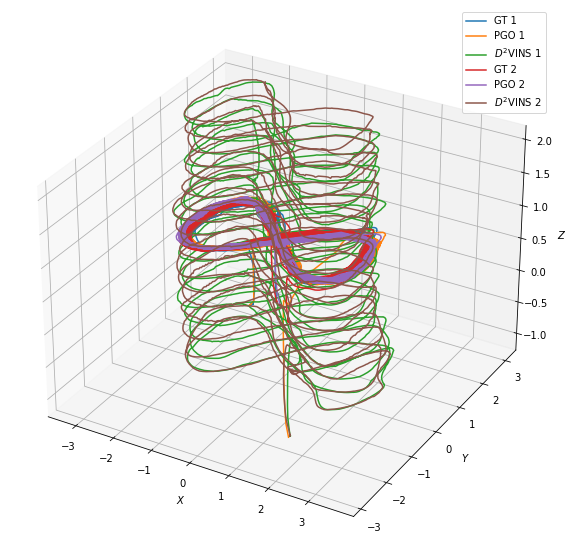

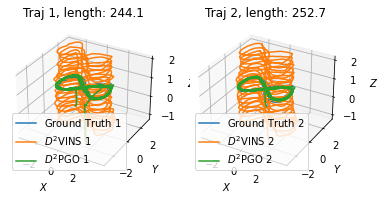

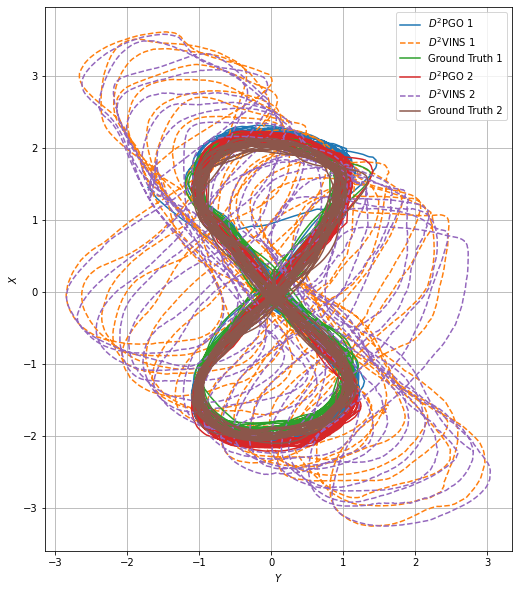

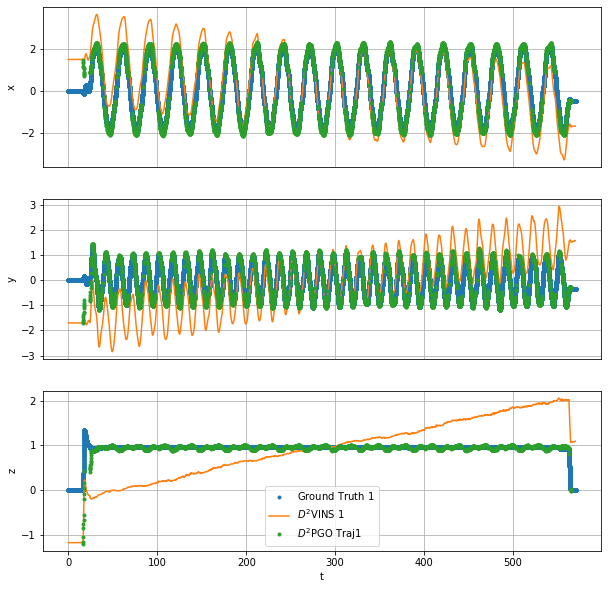

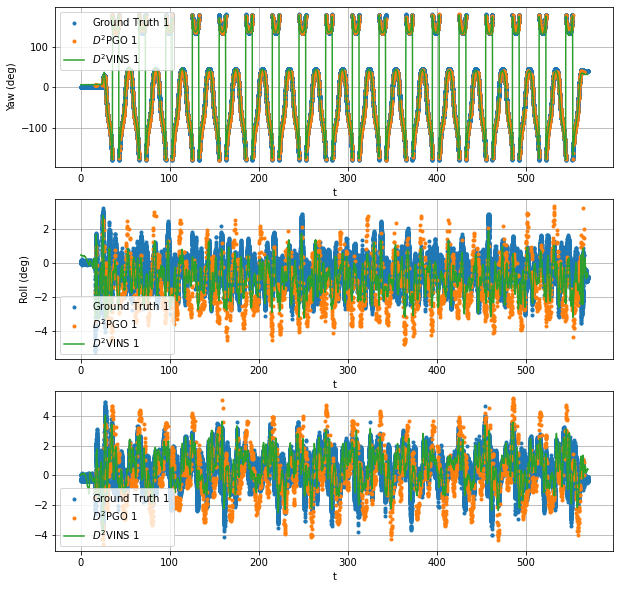

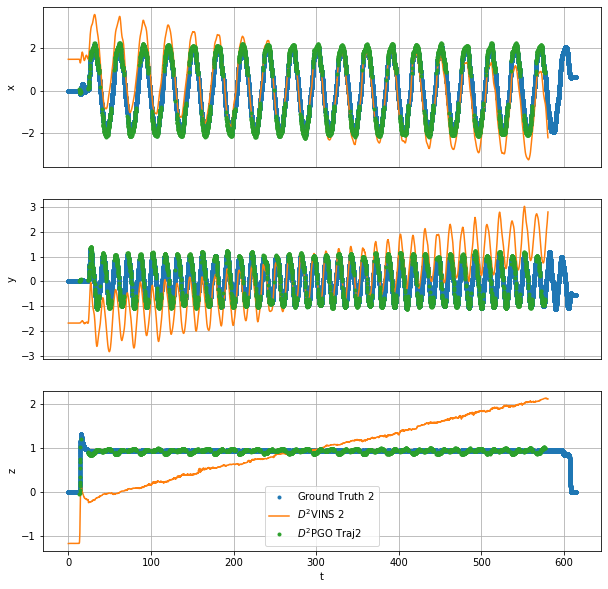

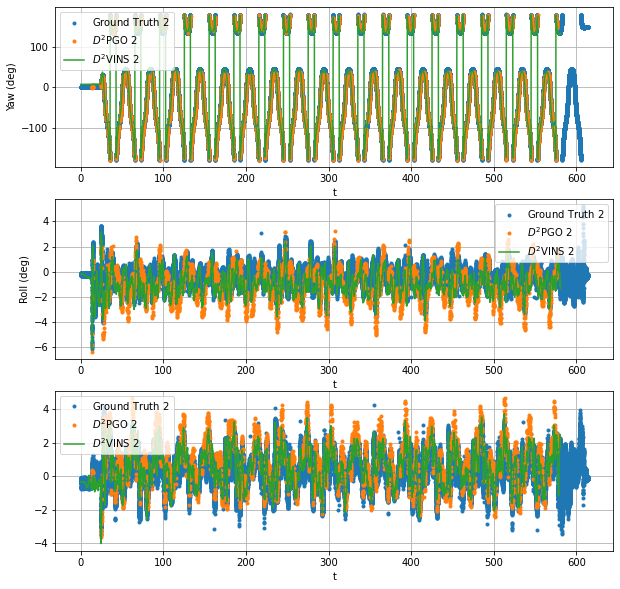

In [7]:
nodes = [1, 2]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-2-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))
# plot_fused(nodes, paths, poses_pgo=paths_pgo, poses_gt=paths_gt, figsize=(10,10))


'<table>\n<tbody>\n<tr><td>Drone</td><td>Traj. Len.</td><td>ATE Pos</td><td>ATE Att</td><td>Cov/m: x</td><td>y      </td><td>z      </td><td>Cov Att/m</td><td>PGO:ATE Pos</td><td>ATE Att</td></tr>\n<tr><td>1by1 </td><td>242.3m    </td><td>2.637  </td><td>17.406 </td><td>3.5e-03 </td><td>7.0e-03</td><td>2.0e-04</td><td>1.39e-02 </td><td>0.159      </td><td>3.765° </td></tr>\n<tr><td>2by1 </td><td>241.6m    </td><td>2.650  </td><td>17.200 </td><td>3.3e-03 </td><td>6.6e-03</td><td>1.9e-04</td><td>3.19e-03 </td><td>0.147      </td><td>3.165° </td></tr>\n<tr><td>3by1 </td><td>241.7m    </td><td>2.691  </td><td>18.309 </td><td>3.6e-03 </td><td>6.6e-03</td><td>2.1e-04</td><td>3.89e-03 </td><td>0.149      </td><td>3.534° </td></tr>\n<tr><td>4by1 </td><td>242.1m    </td><td>2.595  </td><td>17.603 </td><td>3.0e-03 </td><td>7.1e-03</td><td>2.3e-04</td><td>3.27e-03 </td><td>0.148      </td><td>4.281° </td></tr>\n<tr><td>5by1 </td><td>244.1m    </td><td>2.593  </td><td>17.487 </td><td>2.9e-03 </td><td>7.0e-03</td><td>2.6e-04</td><td>3.69e-03 </td><td>0.140      </td><td>3.271° </td></tr>\n<tr><td>Avg. </td><td>242.3     </td><td>2.633  </td><td>17.60  </td><td>        </td><td>       </td><td>       </td><td>         </td><td>0.149      </td><td>3.60   </td></tr>\n</tbody>\n</table>'

'<table>\n<tbody>\n<tr><td>Relative</td><td>EST RMSE: Pos (XYZ)</td><td>POS  </td><td>Ang  </td><td>BIAS: Pos           </td><td>Ang   </td></tr>\n<tr><td>1-&gt;2    </td><td>0.022,0.015,0.009  </td><td>0.028</td><td>1.02°</td><td>-0.015,-0.004,+0.002</td><td>-0.28°</td></tr>\n<tr><td>1-&gt;3    </td><td>0.025,0.016,0.009  </td><td>0.032</td><td>1.09°</td><td>-0.012,+0.000,+0.002</td><td>+0.14°</td></tr>\n<tr><td>1-&gt;4    </td><td>0.027,0.019,0.010  </td><td>0.034</td><td>1.01°</td><td>-0.012,-0.000,+0.002</td><td>-0.14°</td></tr>\n<tr><td>1-&gt;5    </td><td>0.026,0.017,0.010  </td><td>0.032</td><td>1.03°</td><td>-0.011,-0.003,-0.000</td><td>-0.03°</td></tr>\n<tr><td>Avg:    </td><td>                   </td><td>0.031</td><td>1.04°</td><td>                    </td><td>      </td></tr>\n</tbody>\n</table>'

PGO RP


'<table>\n<tbody>\n<tr><td>Relative</td><td>EST RMSE: Pos (XYZ)</td><td>POS  </td><td>Ang  </td><td>BIAS: Pos           </td><td>Ang   </td></tr>\n<tr><td>1-&gt;2    </td><td>0.036,0.072,0.045  </td><td>0.092</td><td>1.18°</td><td>-0.007,+0.005,-0.014</td><td>+0.13°</td></tr>\n<tr><td>1-&gt;3    </td><td>0.035,0.072,0.042  </td><td>0.091</td><td>1.24°</td><td>-0.004,+0.009,-0.009</td><td>+0.10°</td></tr>\n<tr><td>1-&gt;4    </td><td>0.035,0.075,0.043  </td><td>0.093</td><td>1.17°</td><td>-0.003,+0.011,-0.006</td><td>+0.31°</td></tr>\n<tr><td>1-&gt;5    </td><td>0.031,0.070,0.041  </td><td>0.087</td><td>1.13°</td><td>-0.009,-0.001,-0.005</td><td>+0.25°</td></tr>\n<tr><td>Avg:    </td><td>                   </td><td>0.091</td><td>1.18°</td><td>                    </td><td>      </td></tr>\n</tbody>\n</table>'

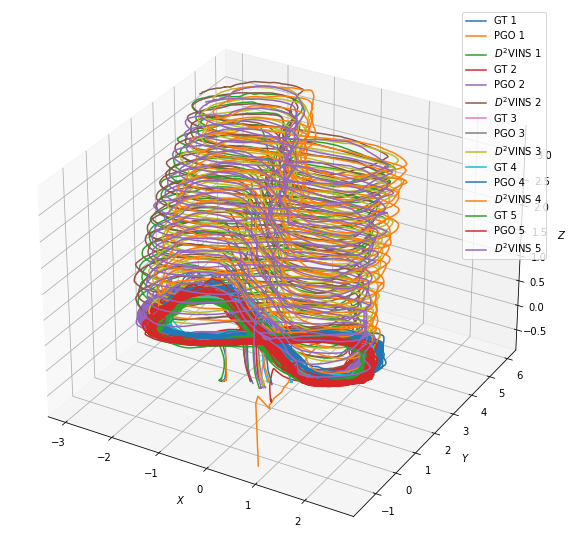

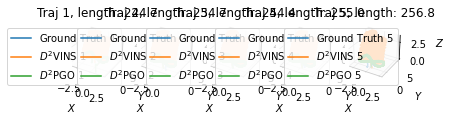

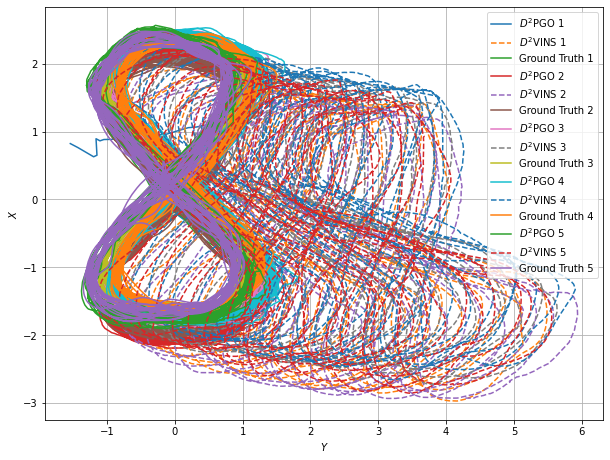

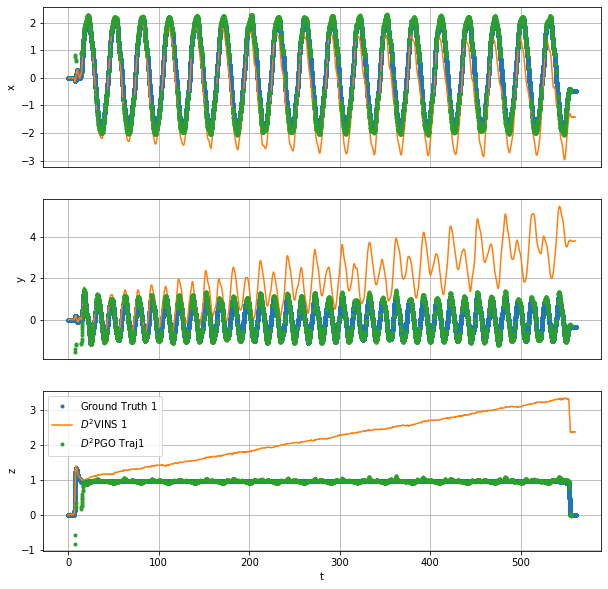

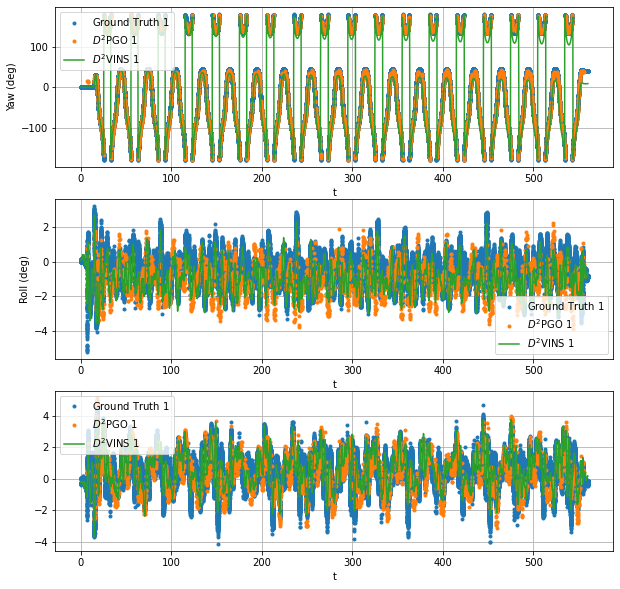

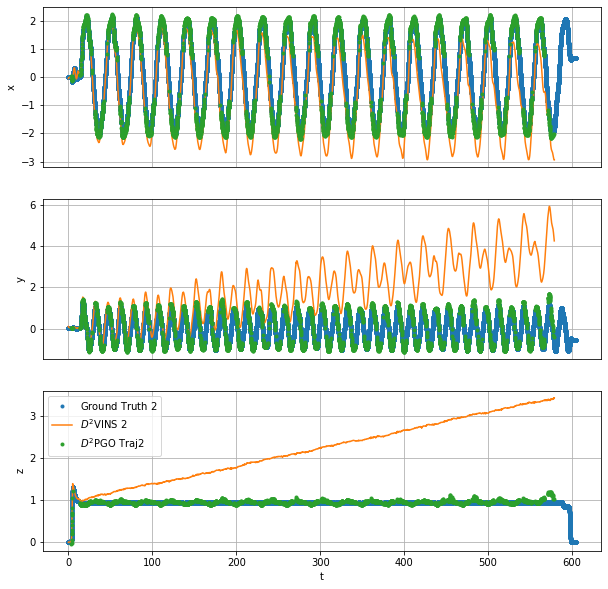

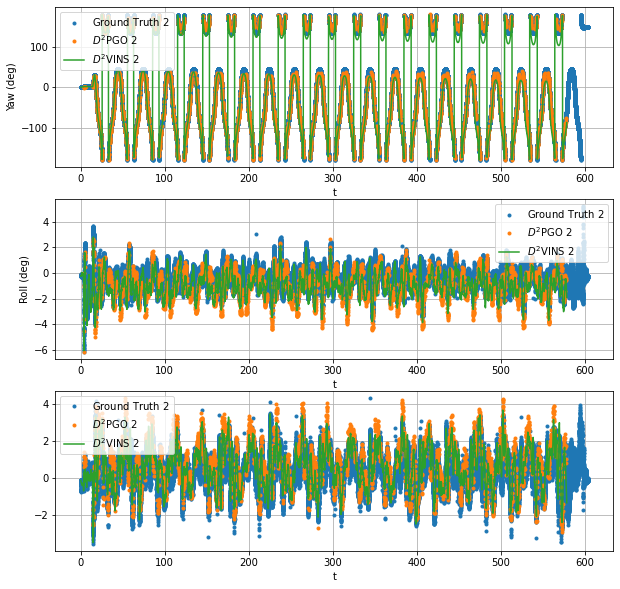

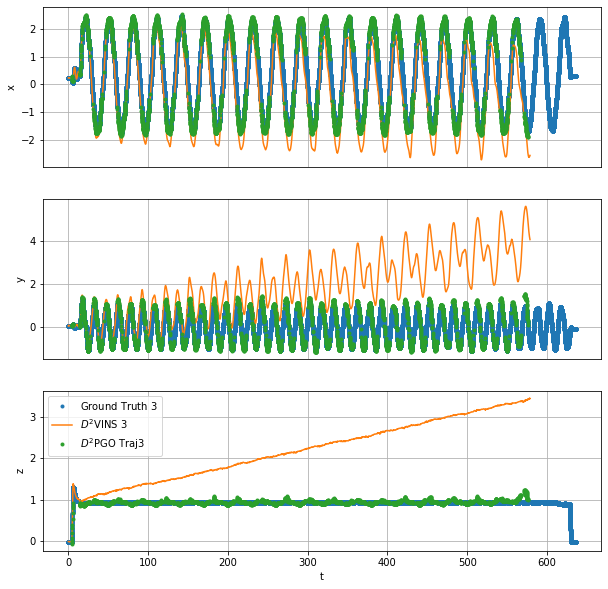

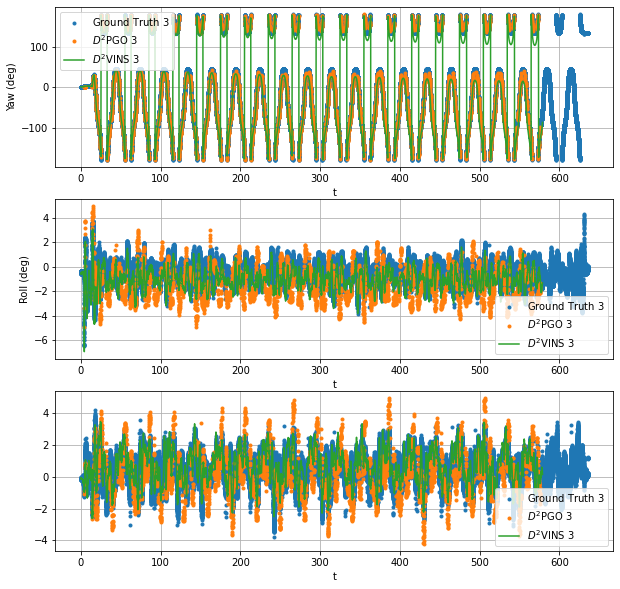

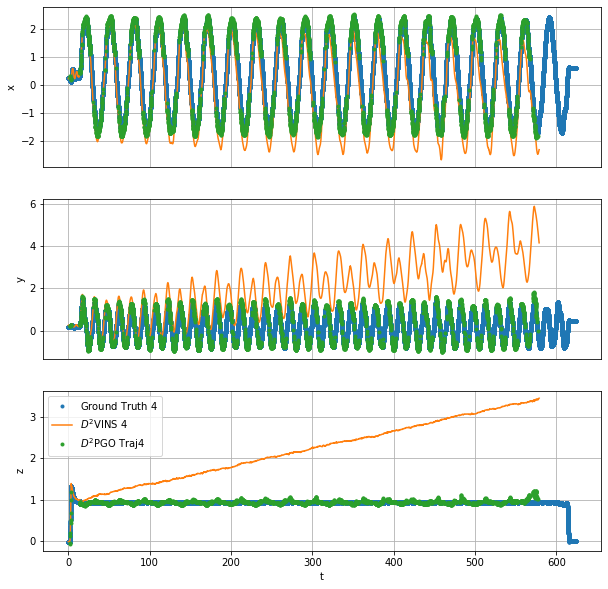

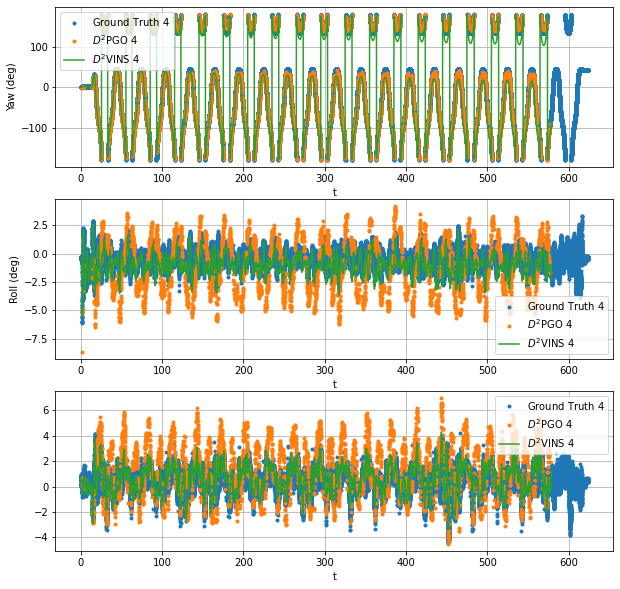

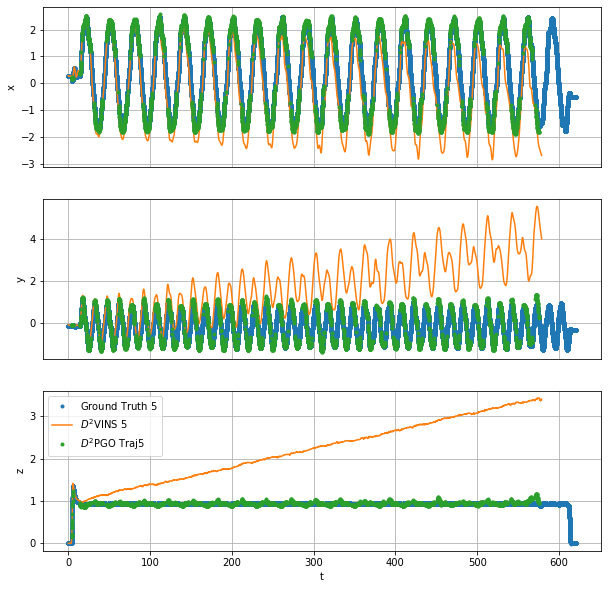

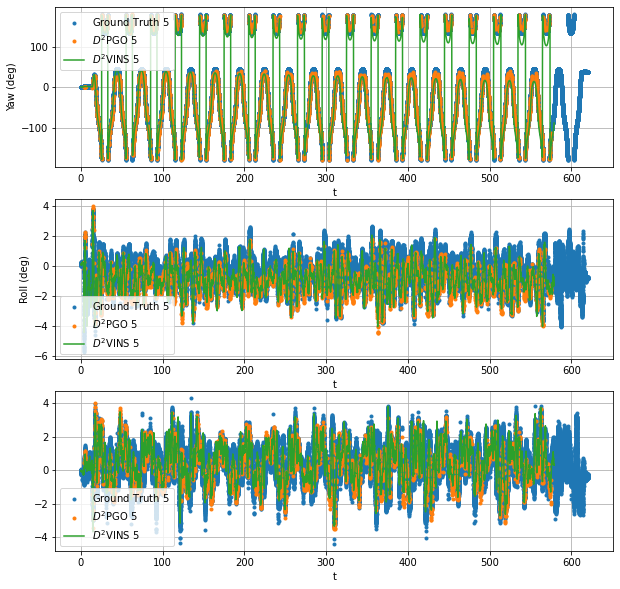

In [3]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-5-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=False)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))
print("PGO RP")
display(plot_relative_pose_err(1, nodes[1:], paths_pgo, paths_gt, dte=dte, show=False))
plot_fused(nodes, paths, poses_pgo=paths_pgo, poses_gt=paths_gt, figsize=(10,10))


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 4, 5, 6, 7]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_noyaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 3, 4, 5]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_yaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")
